In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from utils import load_toxic_comment

In [2]:
subsample_fracs = pickle.load(open("output/tf_subsample_fracs.p", "rb"))
tf_accs = pickle.load(open("output/tf_accs.p", "rb"))
uf_accs = pickle.load(open("output/uf_accs.p", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'output/uf_accs.p'

In [ ]:
X_train, y_train, X_test, y_test = load_toxic_comment(verbose=True)

In [ ]:
n_train = len(X_train)
n_sizes = n_train * np.array(subsample_fracs)

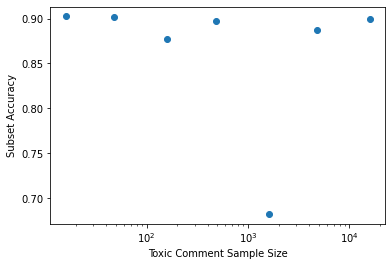

In [11]:
plt.plot(n_sizes, tf_accs, 'r', label = 'TF')
plt.plot(n_sizes, uf_accs, 'b', label = 'UF')
plt.xscale("log")
plt.xlabel("Toxic Comment Sample Size")
plt.ylabel("Subset Accuracy")
plt.legend(loc = 'bottom right')
plt.show()